<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/arvore_decis%C3%A3o_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O que é?

Árvore de Decisão é um algoritmo supervisionado de aprendizado de máquina utilizado para classificação e regressão.

O objetivo é criar um modelo que prevê o valor do target, aprendendo regras simples através das features.


Vantagens

Simples de entender e interpretar

Necessita pouca preparação dos dados

É capaz de lidar com variáveis númericas e categóricas


Desvantagens

Árvores de decisão são propensos a criar modelos com overfitting que não generalizam bem

Podem ser instáveis pois pequenas variáveis podem gerar árvores totalmente diferentes

As previsões não são contínuas, mas sim aproximações

Na prática

Iremos utilizar um dataset de classificação de flores do Scikit-Learn, onde há 3 possíveis classes. Vamos treinar uma árvore de decisão para classificar uma flor, a partir de suas características, em setosa, versicolor ou virginica.

O Iris dataset é um conjunto de dados popular em Machine Learning que contém medições de diferentes características de três espécies de flores do gênero Iris (Iris-setosa, Iris-versicolor, e Iris-virginica). O conjunto é composto por 150 amostras de flores, cada uma com quatro características: comprimento e largura da sépala, e comprimento e largura da pétala. O objetivo clássico ao utilizar este conjunto de dados é prever a espécie da flor com base nas suas características.

A função load_iris do módulo sklearn.datasets carrega o dataset já formatado para ser utilizado em análises.

Estrutura do Dataset

Ao carregar o Iris dataset com o load_iris, o retorno é um objeto do tipo Bunch, que é semelhante a um dicionário. Ele contém os seguintes campos:

data: Um array 2D (n_samples, n_features) que contém as características da flor.

target: Um array 1D com as espécies correspondentes para cada amostra (0: setosa, 1: versicolor, 2: virginica).

target_names: Uma lista com os nomes das espécies.

feature_names: Uma lista com os nomes das características.

DESCR: Uma descrição detalhada do dataset.


In [12]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree


# Carregar o dataset
iris = load_iris()

data = iris.data
target = iris.target

# Imprima as primeiras linhas dos dados
print("Dados:")
print(data[:5])  # Imprime as cinco primeiras linhas dos dados

# Imprima as primeiras linhas do alvo
print("\nAlvo:")
print(target[:5])  # Imprime as cinco primeiras linhas do alvo





Dados:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Alvo:
[0 0 0 0 0]


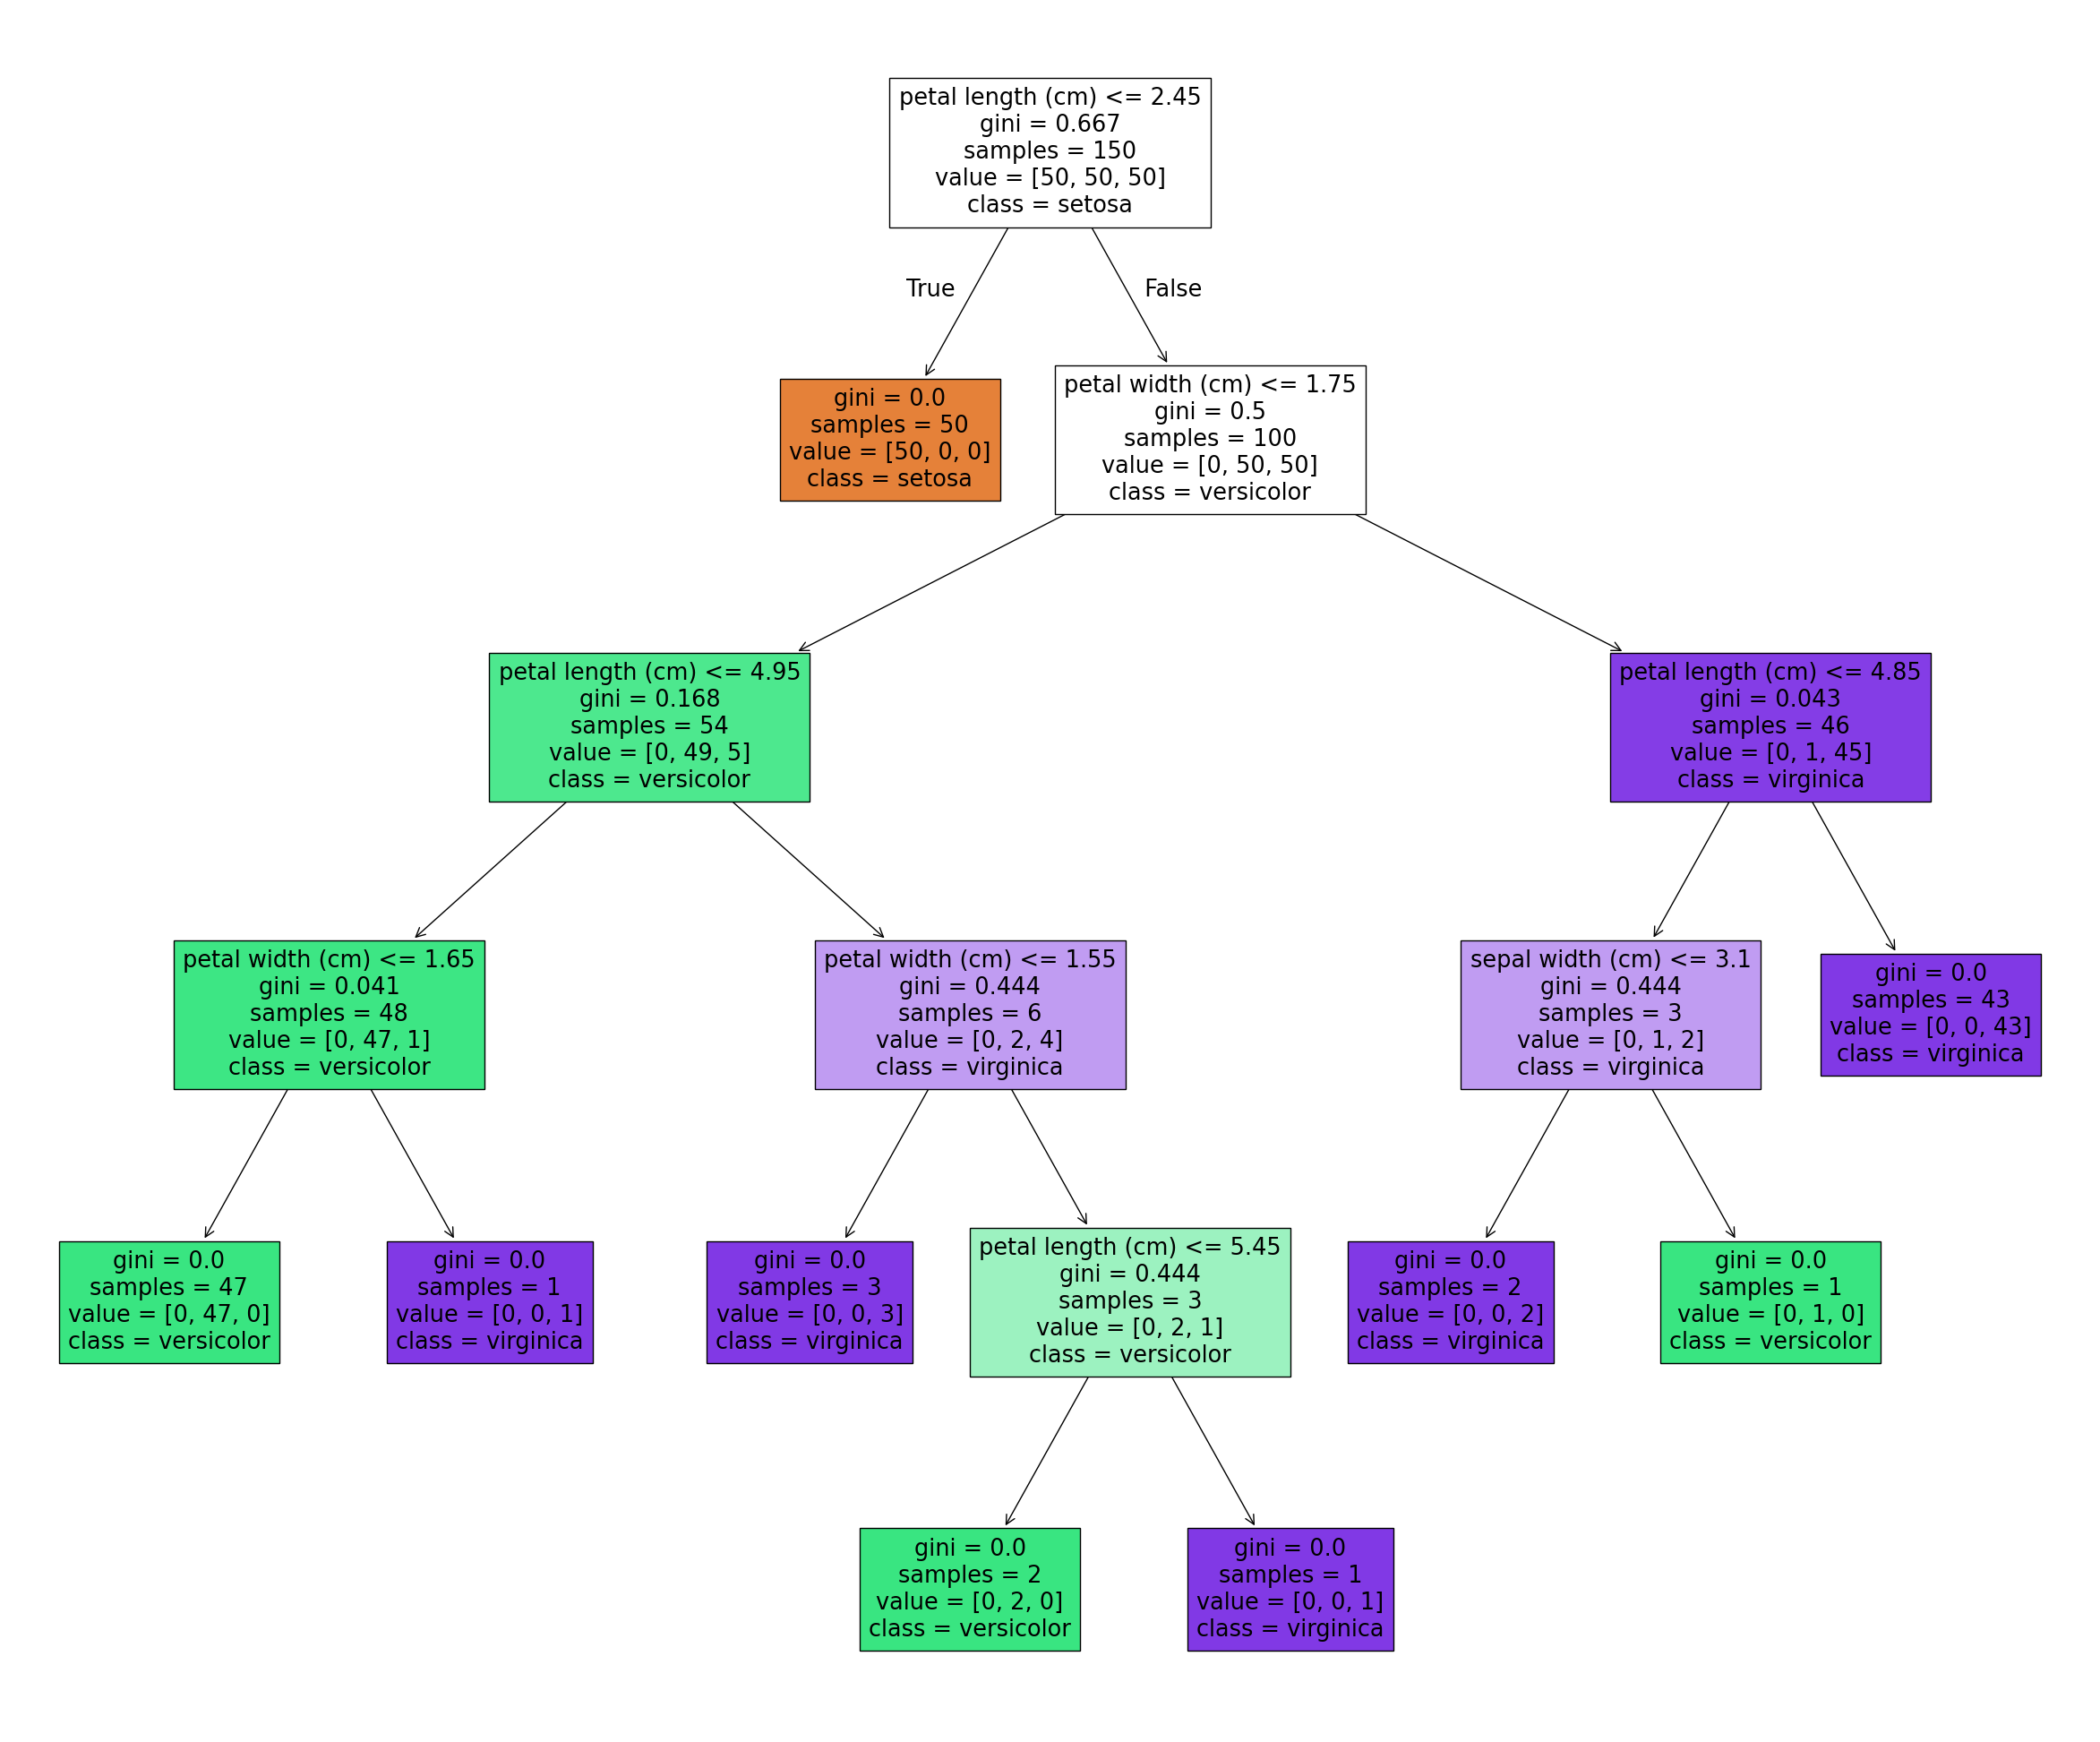

In [23]:
# Separa os dados de entrada (X) e os rótulos (y) das classes
X, y = iris.data, iris.target

# Cria um classificador baseado em árvore de decisão
classificador = tree.DecisionTreeClassifier()

# Treina o classificador com os dados do conjunto Iris
classificador.fit(X, y)

# Cria uma figura para exibir a árvore, com tamanho definido
fig = plt.figure(figsize=(30, 25))

# Plota a árvore de decisão treinada com nomes das características e classes
tree.plot_tree(
    classificador,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True  # Preenche os nós com cores baseadas nas classes
)

# Salva a árvore de decisão como uma imagem JPEG
plt.savefig('arvore.jpg')


Gini
A impureza de Gini mede a probabilidade de uma instância qualquer ser escolhida aleatoriamente. Quanto menor o valor o valor, maior o grau de pureza daquele nó. Atinge seu mínimo (zero) quando todos os casos no nó caem em uma única categoria de destino. Isto é um nó puro.

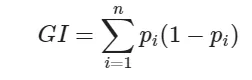
Fórmula do Coeficiente de Gini

GI é o coeficiente de gini

n é número de amostras

pi é a probabilidade da classe


Pegando um nó qualquer, é possível perceber que o gini é de 0.168. A conta para obter esse resultado seria essa:
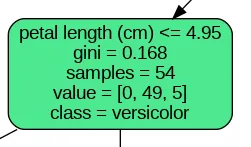

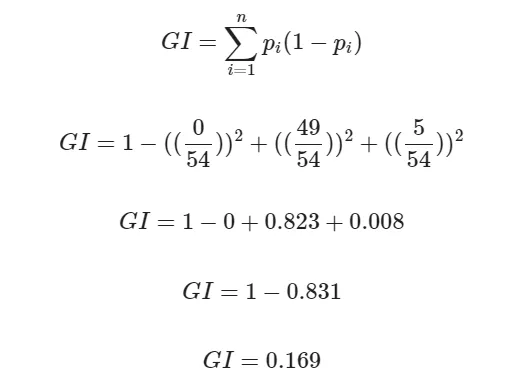

Como a árvore trabalha com valores exatos e eu arredondei, houve uma diferença de 0.001. Mas nada que impacte o nosso resultado final, podemos ignorar essa diferença.

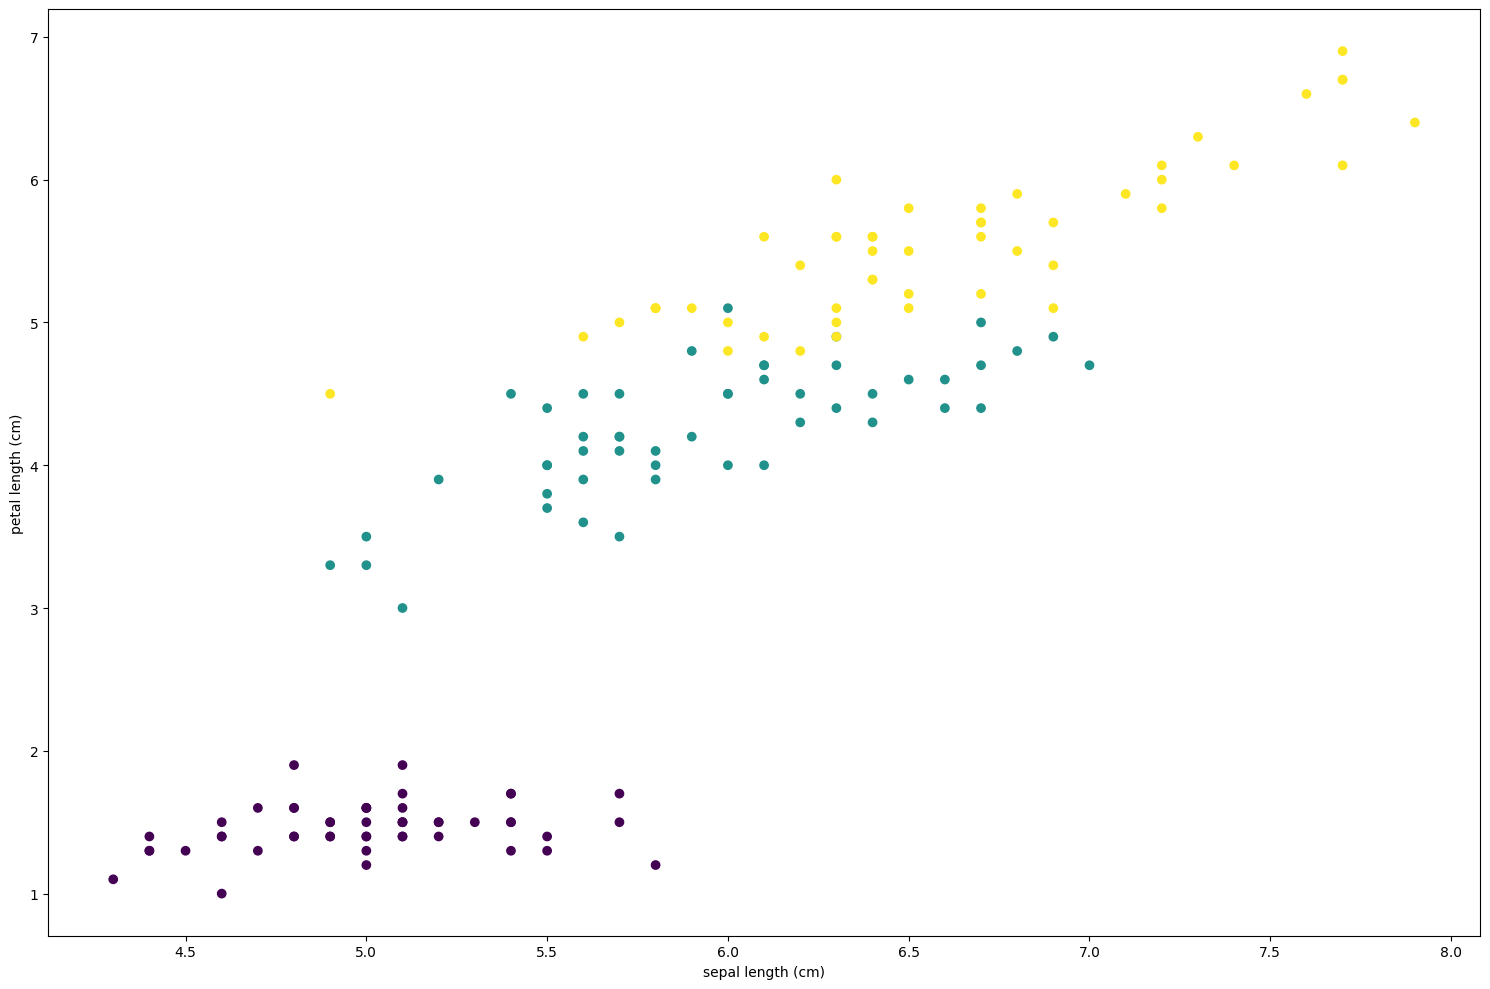

In [18]:
# Cria uma figura para o gráfico de dispersão com tamanho especificado
plt.figure(figsize=(15, 10))

# Cria um gráfico de dispersão (scatter plot) usando:
# - a primeira característica (índice 0) no eixo X
# - a terceira característica (índice 2) no eixo Y
# - a cor de cada ponto definida pela classe (espécie da flor) correspondente
plt.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)

# Define o rótulo do eixo X como o nome da primeira característica
plt.xlabel(iris.feature_names[0])

# Define o rótulo do eixo Y como o nome da terceira característica
plt.ylabel(iris.feature_names[2])

# Ajusta automaticamente o layout da figura para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()


Esse código acima gera um gráfico de dispersão para visualizar a relação entre duas características das flores do conjunto de dados Iris (por padrão, comprimento da sépala vs. comprimento da pétala), colorindo os pontos de acordo com a espécie da flor.

Text(0, 0.5, 'petal width (cm)')

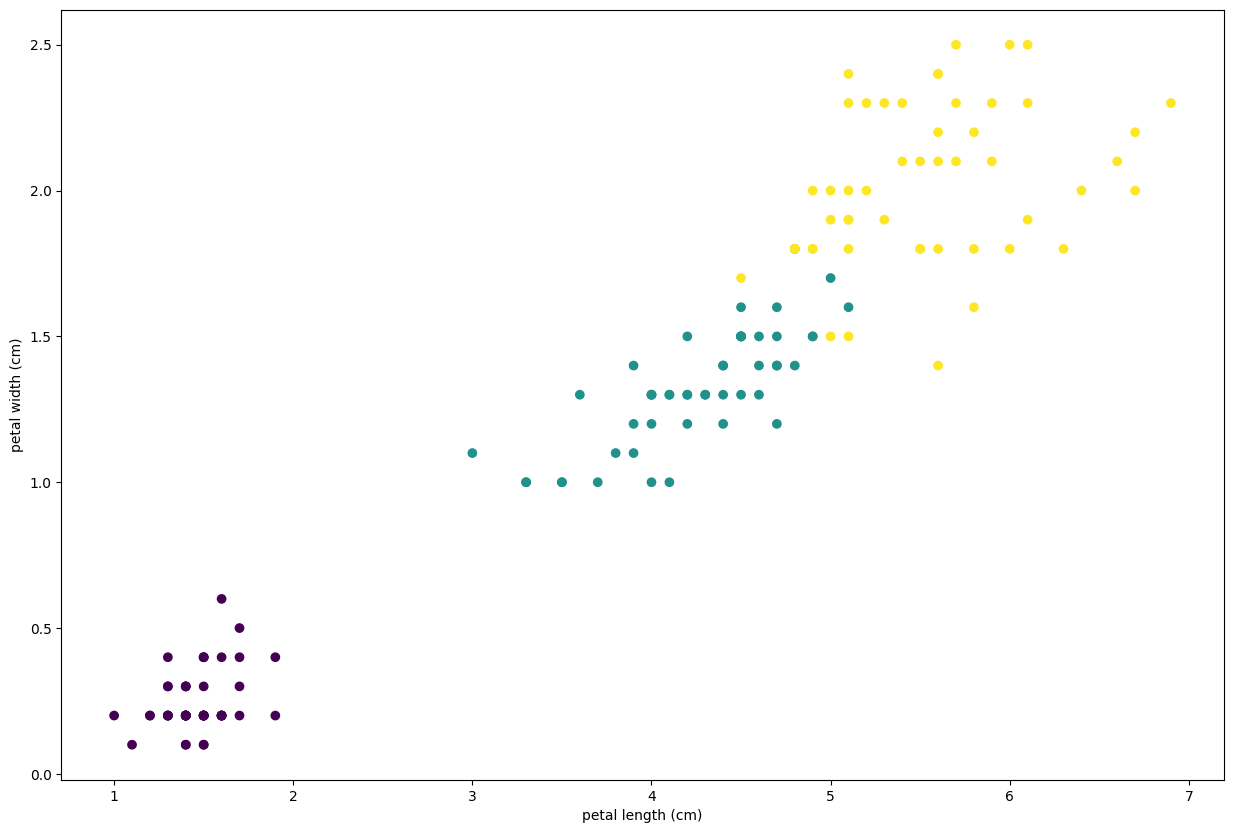

In [22]:
# Cria uma nova figura para o gráfico, com tamanho 15x10 polegadas
plt.figure(figsize=(15, 10))

# Cria um gráfico de dispersão (scatter plot) usando:
# - a terceira característica (índice 2, normalmente comprimento da pétala) no eixo X
# - a quarta característica (índice 3, normalmente largura da pétala) no eixo Y
# - as cores dos pontos (parâmetro 'c') determinadas pelas classes (espécies) das flores
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

# Define o rótulo do eixo X com o nome da terceira característica
plt.xlabel(iris.feature_names[2])

# Define o rótulo do eixo Y com o nome da quarta característica
plt.ylabel(iris.feature_names[3])